# Case - Modelo Preditivo para aprovacao de credito

## 01 - Analise Exploratória
<p>
Modelos de score de crédito calculam a probabilidade de inadimplência e são uma das
principais ferramentas utilizadas por diversas empresas para aprovar ou negar um crédito.
O objetivo deste desafio é criar um modelo preditivo calculando a probabilidade de
inadimplência de cada novo pedido de crédito.
    
    
<b>Dados</b>:
Cada linha representa um cliente e as colunas representam os dados (informações) desses
clientes.
A variável resposta é a coluna inadimplente, que indica se o tomador veio a se tornar
inadimplente(1) ou não(0).
    
    
<b>As variáveis da base de dados são descritas abaixo:</b>
    <ul>
        <li>idade: A idade do cliente</li>
        <li>numero_de_dependentes: O número de pessoas dependentes do cliente.</li>
        <li>salario_mensal: Salário mensal do cliente.</li>
        <li>numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o
cliente possui em aberto.</li>
        <li>util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite
dele, de linhas de crédito que não são seguradas por qualquer bem do tomador
e.g: imoveis, carros etc.</li>
        <li>vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30
e 59 dias, o pagamento de um empréstimo.</li>
        <li>razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito =
Dividas/Patrimônio</li>
        <li>numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.</li>
        <li>numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente
atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.</li>        
    </ul>
    
Obs: Estes dados foram retirados de terceiros, portanto é possível que existam
incoerências, o que é perfeitamente comum em dados reais.


<b>Objetivo:</b>
Construir qualquer modelo preditivo utilizando o arquivo treino.csv.
Utilize este modelo para gerar as previsões na base teste.csv, inserindo uma nova coluna
na tabela de dados do arquivo teste.csv que contenha as previsões e nomeie esta coluna
com o nome "inadimplente".
Espera-se que não seja necessário mais que um dia para a resolução deste problema.

</p>

<p>
    <b>Author: </b>Joao Paulo Ribeiro dos Santos<br>
    <b>E-mail: </b>joao1615@gmail.com  <b>ou</b>  joao1615@faculdadefia.edu.br<br>
    <b>Telefone: </b> (11)9 6816-5227
</p>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Joao Paulo" --iversions

Author: Joao Paulo

matplotlib: 3.3.2
seaborn   : 0.11.1
numpy     : 1.19.2
pandas    : 1.2.1



In [3]:
# Importacao dos datasets
df_train = pd.read_csv('processed_data/train_treated.csv')
df_test = pd.read_csv('processed_data/test_treated.csv')

In [4]:
# Tipo dos dados
df_train.dtypes

util_linhas_inseguras                    float64
idade                                      int64
vezes_passou_de_30_59_dias                 int64
razao_debito                             float64
salario_mensal                           float64
numero_linhas_crdto_aberto                 int64
numero_vezes_passou_90_dias                int64
numero_emprestimos_imobiliarios            int64
numero_de_vezes_que_passou_60_89_dias      int64
numero_de_dependentes                    float64
inadimplente                               int64
dtype: object

In [5]:
# Tipo dos dados
df_test.dtypes

util_linhas_inseguras                    float64
idade                                      int64
vezes_passou_de_30_59_dias                 int64
razao_debito                             float64
salario_mensal                           float64
numero_linhas_crdto_aberto                 int64
numero_vezes_passou_90_dias                int64
numero_emprestimos_imobiliarios            int64
numero_de_vezes_que_passou_60_89_dias      int64
numero_de_dependentes                    float64
dtype: object

In [6]:
# Verificar as primeiras linhas
df_train.head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [7]:
# Verificar as primeiras linhas
df_test.head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


### Analisando as principais métricas estatísticas

In [8]:
# Analisando as principais métricas estatísticas
df_train.describe()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
count,107122.000000,107122.000000,107122.000000,107122.000000,1.071220e+05,107122.000000,107122.000000,107122.000000,107122.000000,107122.000000,107122.000000
mean,5.739878,52.053920,0.409738,335.090754,6.419263e+03,8.523245,0.253617,1.031590,0.227414,0.757482,0.067204
std,251.793164,14.592977,4.040379,1945.529270,1.215617e+04,5.141826,4.014827,1.138659,4.000615,1.114670,0.250376
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031180,41.000000,0.000000,0.171790,3.820250e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.160576,52.000000,0.000000,0.357867,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.566611,62.000000,0.000000,0.764921,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [9]:
# Analisando as principais métricas estatísticas
df_test.describe()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,6.374199,52.404025,0.412725,348.004166,6.491462e+03,8.472525,0.255025,1.013700,0.230750,0.736725
std,242.617247,14.781468,4.057899,1934.436246,1.507606e+04,5.164960,4.034327,1.112494,4.017506,1.108148
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029362,41.000000,0.000000,0.175360,3.901000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.149491,52.000000,0.000000,0.366172,5.409500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.549762,63.000000,0.000000,0.872253,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,22000.000000,109.000000,98.000000,307001.000000,1.794060e+06,57.000000,98.000000,25.000000,98.000000,13.000000


In [10]:
def fn_show_individual_outlier(p_df_dataframe, p_column):
    """
    Description:
        Função que exibe um boxplot e as estatisticas descritivas de uma dada coluna de um dataframe

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        None
    
    Exception:
        None
    """
    ## Dataframe com as estatisticas descritivas
    df_summary = pd.DataFrame(p_df_dataframe[p_column].describe())

    ## Tamanho Figura
    plt.figure(figsize = (4, 6))
    
    ## Objeto referente ao boxplot
    ax = sns.boxplot(data = p_df_dataframe[p_column])
    
    ## deixando os x_ticks com valor em branco
    ax.set(xticklabels = [])
    ax.set(ylabel = None)
    
    ## Titulo do boxplot com o nome da coluna
    ax.set(title = 'Parâmetro: ' + p_column)
    
    ## Tabela que será gerada junto com o gráfico, onde tera as estatisticas
    statistics_table = plt.table( cellText = df_summary.values,
                                    rowLabels = df_summary.index,
                                    colLabels =  ' ',
                                    cellLoc = 'left', 
                                    rowLoc = 'center',            
                                    loc ='bottom')
    
    ## Tamanho da fonte da tabela
    statistics_table.set_fontsize(12)
    
    ## Escala da tabela
    statistics_table.scale(1, 2)
    
    ## Colocar a tabela debaixo do boxplot
    plt.subplots_adjust(left = 0.2, bottom = .1)
    
    ## Exibir figura
    plt.show()

In [11]:
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Função que localiza outliers em um dataframe e retorna tais dados

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        df_with_outliers -- Dataframe com os outliers captados
    
    Exception:
        None
    """
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("Nao Foram identificados outliers")
    
    return df_with_outliers

In [12]:
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Retorna o numero de outliers por coluna em um dado dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            Objeto com o numero de outliers por coluna em um dataframe

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
            
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out

In [13]:
# Total de outliers
fn_number_of_outliers_per_dataframe(df_train)

util_linhas_inseguras                      533
idade                                       82
vezes_passou_de_30_59_dias               17222
razao_debito                             20671
salario_mensal                            6085
numero_linhas_crdto_aberto                2892
numero_vezes_passou_90_dias               6027
numero_emprestimos_imobiliarios            581
numero_de_vezes_que_passou_60_89_dias     5431
numero_de_dependentes                     9748
inadimplente                              7199
dtype: int64

In [14]:
# Total de outliers
fn_number_of_outliers_per_dataframe(df_test)

util_linhas_inseguras                     208
idade                                      10
vezes_passou_de_30_59_dias               6451
razao_debito                             8406
salario_mensal                           2422
numero_linhas_crdto_aberto               1069
numero_vezes_passou_90_dias              2174
numero_emprestimos_imobiliarios           208
numero_de_vezes_que_passou_60_89_dias    2070
numero_de_dependentes                    3588
dtype: int64

#### Variavel alvo: inadimplente

In [15]:
# Dados distribuicao das classes
df_train.inadimplente.value_counts()

0    99923
1     7199
Name: inadimplente, dtype: int64

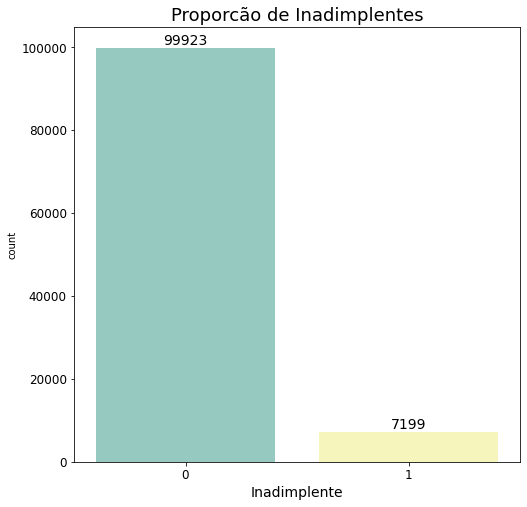

In [16]:
# Tamanho da figura
plt.figure(figsize=(8, 8))


# Objeto referente a distribuição dos dados
ax = sns.countplot(x = "inadimplente", 
                   data = df_train,
                   palette = 'Set3')

# Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x() + 0.4, p.get_height()),
                ha = 'center', 
                va = 'bottom',
                color = 'black',
                size = 14)

# Texto eixo X
plt.xlabel('Inadimplente',
           fontsize = 14)

# Titulo
plt.title('Proporcão de Inadimplentes', 
          fontsize = 18)

# Exibir
plt.show()

Percebe-se que existem poucos inadimplentes, com isso há um claro desbalanceamento de classes, isso vai requerer alguma técnica para balancear como Oversampling, Undersampling ou SMOTE

#### Variavel alvo: util_linhas_inseguras

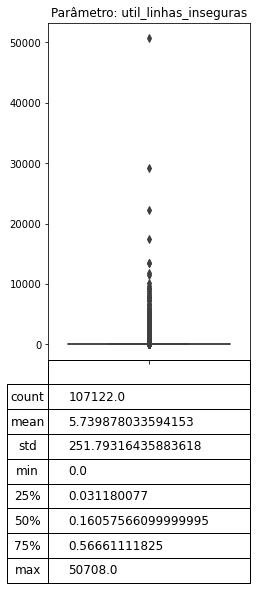

In [17]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train, 'util_linhas_inseguras')

In [18]:
# Captar os outliers
fn_catching_outliers(df_train, 'util_linhas_inseguras')

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
222,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0,1
286,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0,0
674,2066.000000,58,0,0.271121,6000.0,8,1,1,0,1.0,1
871,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0,0
1617,1.708045,47,0,1.862758,1500.0,6,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
105406,3.024876,58,1,352.000000,5400.0,2,0,0,2,0.0,0
105783,2.093097,50,4,0.304044,13576.0,14,0,2,1,3.0,0
106448,2.023256,43,0,237.000000,5400.0,2,6,0,0,0.0,1
106544,3.210493,29,0,0.184493,5300.0,13,0,0,0,0.0,0


In [19]:
# Analisando os percentis
lst_percent = [0, 5, 25, 50, 75, 90, 99, 100]

for x in lst_percent:
    print('Percentil [' + str(x) + '] igual a: ' + str(np.percentile(df_train['util_linhas_inseguras'], x)))

Percentil [0] igual a: 0.0
Percentil [5] igual a: 0.0
Percentil [25] igual a: 0.031180077
Percentil [50] igual a: 0.16057566099999995
Percentil [75] igual a: 0.56661111825
Percentil [90] igual a: 0.9807798759
Percentil [99] igual a: 1.0921799567999995
Percentil [100] igual a: 50708.0


Analisando os outliers detectados, bem como os percentis percebe-se uma quantidade de 533 outliers nessa base de dados de um total de 107122 registros. Os outliers tendem a afetar os modelos estatisticos, logo eles serão removidos da base, afinal não representam nem 1% dos dados

In [20]:
Q1 = df_train['util_linhas_inseguras'].quantile(0.25)
Q3 = df_train['util_linhas_inseguras'].quantile(0.75)
IQR = Q3 - Q1

df_train_treated = df_train[~((df_train['util_linhas_inseguras'] < (Q1 - 1.5 * IQR)) | 
                              (df_train['util_linhas_inseguras'] > (Q3 + 1.5 * IQR)))]

In [21]:
# Analisando as metricas
df_train_treated['util_linhas_inseguras'].describe()

count    106589.000000
mean          0.320586
std           0.350018
min           0.000000
25%           0.030910
50%           0.158160
75%           0.556789
max           1.369261
Name: util_linhas_inseguras, dtype: float64

Com o ajuste feito as métricas obtidas se encontram com valores mais consistentes, o que é possivel ver pelo desvio padrão. No geral os dados estão distantes em média 0.35 desvios padrões da média geral.

#### Variavel alvo: idade

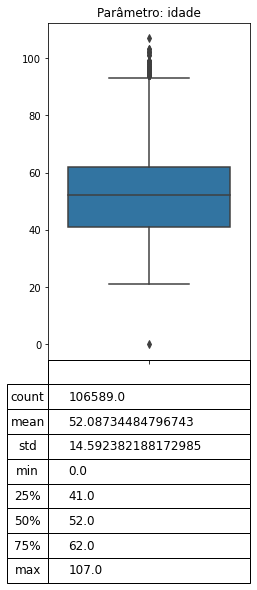

In [22]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'idade')

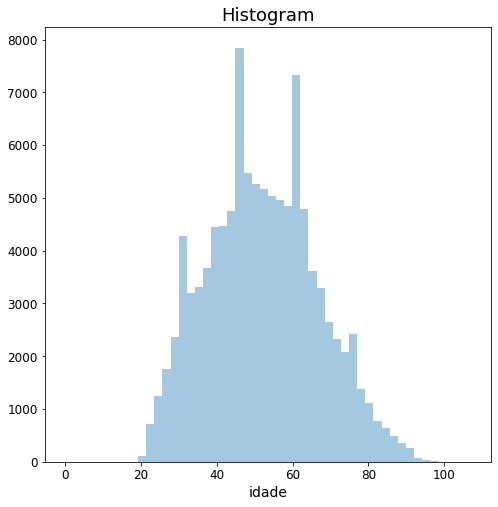

In [23]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['idade'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('idade',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [24]:
# Idades menores ou iguais a Zero
df_train_treated[df_train_treated['idade'] <= 0]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
63959,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0


Não faz muito sentido a idade de um cliente ser ZERO, ainda mais pra pedir uma aprovacão de crédito. Sem falar que esse cliente possui dependentes.

Possivelmente ocorreu erro na digitacão dos dados, sendo assim aplicaremos a esse registro a mediana das idades.

Obs. um ponto interessante sobre essa variável, é que tanto a media quanto a mediana são muito próximas, caracterizando que os dados estão bem distribuidos

In [25]:
# Aplicando a mediana
df_train_treated.idade[df_train_treated['idade'] <= 0] = df_train_treated['idade'].median()

# Aplicando a mediana
df_test_treated = df_test.copy()
df_test_treated.idade[df_test_treated['idade'] <= 0] = df_test_treated['idade'].median()

#### Variavel alvo: vezes_passou_de_30_59_dias

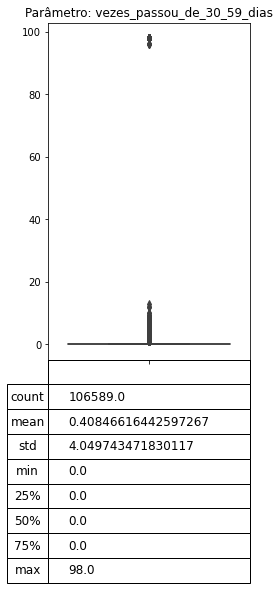

In [26]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'vezes_passou_de_30_59_dias')

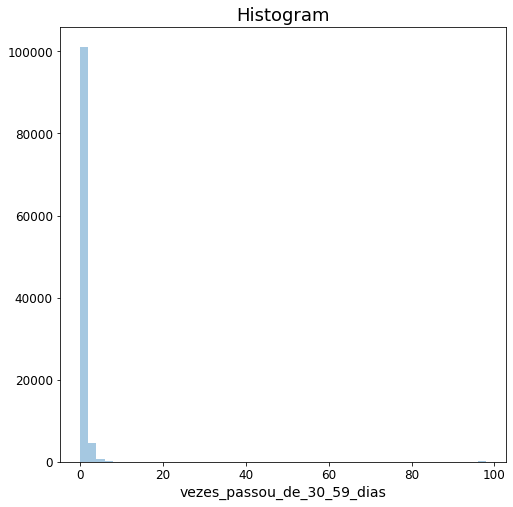

In [27]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['vezes_passou_de_30_59_dias'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('vezes_passou_de_30_59_dias',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [28]:
# Total de outliers
fn_number_of_outliers_per_dataframe(df_train_treated)['vezes_passou_de_30_59_dias']

17011

O comportamento dessa coluna não foge dos dados do mundo real, há clientes que atrasam o pagamento, e clientes que não atrasam.

Nesse primeiro momento esses outliers não serão tratados, inclusive eles serão acrescidos aos modelos de machine learning, e caso impavtem severamente o modelo, realizaremos alguns tratamentos

#### Variavel alvo:  numero_vezes_passou_90_dias

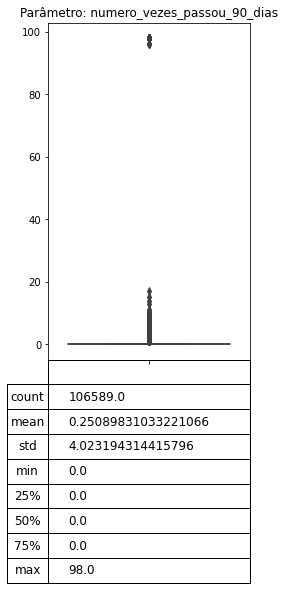

In [29]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'numero_vezes_passou_90_dias')

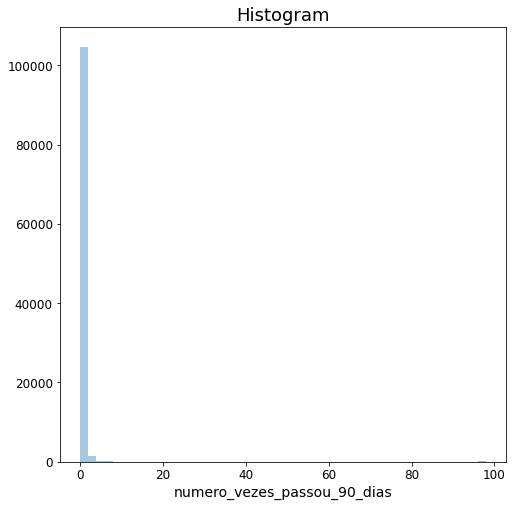

In [30]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['numero_vezes_passou_90_dias'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('numero_vezes_passou_90_dias',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

O comportamento dessa coluna é muito similar ao da vezes_passou_de_30_59_dias, sendo assim aplicaremos a mesma lógica de incluir esses dados no modelo e caso seja necessario tratá-los.

#### Variavel alvo:  razao_debito

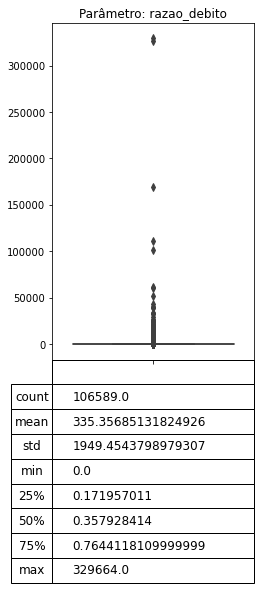

In [31]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'razao_debito')

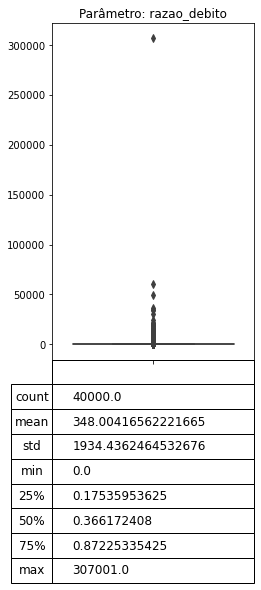

In [32]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_test_treated, 'razao_debito')

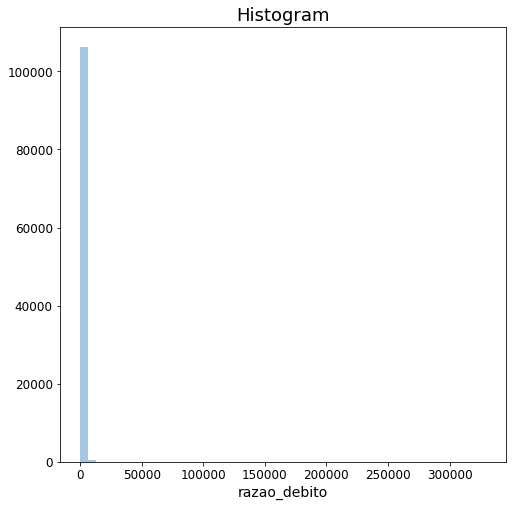

In [33]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['razao_debito'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('razao_debito',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

Essa variavel diz respeito a razão entre as dividas e o patrimonio, logo quanto maior for o valor dessa variavel maires serão os valores das dividas. Essa variavel tem muitos outliers, pois a grande maioria dos clientes não possuem dividas altas ou possuem um patrimonio be elevado.

Criaremos uma coluna que indicara se as dividas são maiores que o patrimonio, assim poderemos colocar essa variavel nos modelos, inclusive invertendo, ora colocando a razao_debito ora colocando a nova variavel.

In [34]:
# Criando coluna nova
df_train_treated['possui_mais_dividas'] = np.where(df_train_treated['razao_debito'] >= 1, 1, 0 )

df_test_treated['possui_mais_dividas'] = np.where(df_test_treated['razao_debito'] >= 1, 1, 0 )

In [35]:
# Relacao(%) de clientes que possuem mais dividas base
df_train_treated['possui_mais_dividas'].value_counts() * 100/ len(df_train_treated['possui_mais_dividas'])

0    78.219141
1    21.780859
Name: possui_mais_dividas, dtype: float64

In [36]:
# Relacao de clientes que possuem mais dividas
df_test_treated['possui_mais_dividas'].value_counts()

0    30550
1     9450
Name: possui_mais_dividas, dtype: int64

In [37]:
df_train_treated.describe()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas
count,106589.000000,106589.000000,106589.000000,106589.000000,1.065890e+05,106589.000000,106589.000000,106589.000000,106589.000000,106589.000000,106589.000000,106589.000000
mean,0.320586,52.087833,0.408466,335.356851,6.419608e+03,8.537429,0.250898,1.033024,0.226327,0.757292,0.066057,0.217809
std,0.350018,14.591510,4.049743,1949.454380,1.217878e+04,5.143001,4.023194,1.138930,4.010043,1.114530,0.248384,0.412759
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030910,41.000000,0.000000,0.171957,3.824000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.158160,52.000000,0.000000,0.357928,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.556789,62.000000,0.000000,0.764412,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,1.369261,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000,1.000000


#### Variavel alvo:  numero_linhas_crdto_aberto

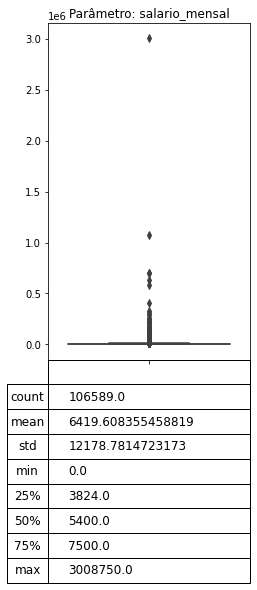

In [38]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'salario_mensal')

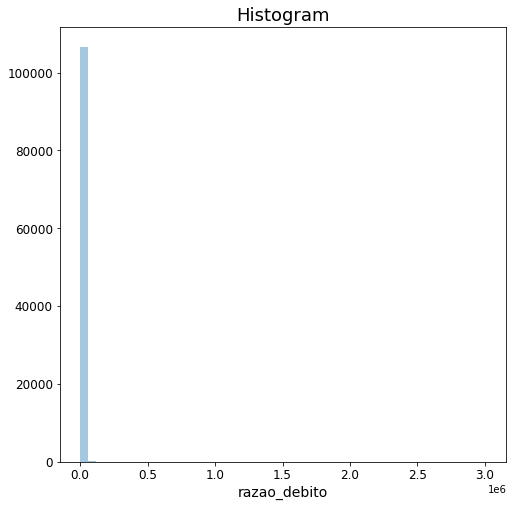

In [39]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['salario_mensal'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('razao_debito',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [40]:
# Analisando os percentis
lst_percent = [0, 5, 25, 50, 75, 90, 95, 99, 99.9999, 100]

for x in lst_percent:
    print('Percentil [' + str(x) + '] igual a: ' + str(np.percentile(df_train_treated['salario_mensal'], x)))

Percentil [0] igual a: 0.0
Percentil [5] igual a: 1500.0
Percentil [25] igual a: 3824.0
Percentil [50] igual a: 5400.0
Percentil [75] igual a: 7500.0
Percentil [90] igual a: 10833.0
Percentil [95] igual a: 13664.799999999974
Percentil [99] igual a: 23250.0
Percentil [99.9999] igual a: 2802368.984981313
Percentil [100] igual a: 3008750.0


In [41]:
# Clientes com salarios inferior a 1000,00
df_train_treated[(df_train_treated['salario_mensal'] <= 1000) & (df_train_treated['salario_mensal'] >= 1)] \
                .sort_values(by = ['salario_mensal'])

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas
64866,0.046756,50,1,316.000000,1.0,23,0,1,0,2.0,0,1
75019,0.080905,56,0,76.000000,1.0,4,0,0,0,1.0,0,1
23184,0.044426,47,0,13.500000,1.0,2,0,0,0,1.0,0,1
81935,0.157920,56,0,34.000000,1.0,1,0,0,0,0.0,0,1
96579,1.000000,58,0,752.000000,1.0,2,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11916,0.227844,39,0,1.303696,1000.0,5,0,1,0,0.0,0,1
69623,0.091670,33,0,2.021978,1000.0,5,0,1,0,0.0,0,1
11771,0.040615,61,0,0.396603,1000.0,11,0,1,0,0.0,0,0
12880,0.033040,45,0,1.214785,1000.0,14,0,1,0,2.0,0,1


In [42]:
# Clientes com salario igual a 1
df_train_treated[df_train_treated['salario_mensal'] == 1].count()[0]

432

In [43]:
# Clientes com salario igual a 1
df_train_treated[df_train_treated['salario_mensal'] == 1]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas
43,0.368876,68,0,1687.5,1.0,31,0,1,0,0.0,0,1
163,0.020966,29,0,639.5,1.0,3,0,1,0,2.0,0,1
191,0.025892,38,0,74.5,1.0,13,0,0,0,2.0,1,1
213,0.222696,42,0,800.0,1.0,3,0,1,0,2.0,0,1
391,0.134192,63,0,926.5,1.0,9,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105374,0.032171,36,0,395.0,1.0,9,0,0,0,2.0,0,1
105957,0.023129,35,0,3014.0,1.0,15,0,2,0,1.0,0,1
105984,0.173295,43,0,1247.5,1.0,11,0,1,0,3.0,0,1
106776,0.021971,43,0,1696.5,1.0,9,0,2,0,3.0,0,1


In [44]:
# Relacão de salario igual a 1 com a situaćão de adimplente ou inadimplente
df_train_treated[(df_train_treated['salario_mensal'] == 1)]['inadimplente'].value_counts()

0    421
1     11
Name: inadimplente, dtype: int64

Existem cientes com um salario menor ou igual a 1000, o que é perfeitamente possivel dado salario minimo e a situacão economica. Mas o que mais chama a atencão são os 432 registros com salario igual a 1.

O que chama a atencão tambem é que em alguns casos o cliente está com divida, talvez tenha perdido a renda mensal seja por desemprego ou falencia de algum negocio, mas a maioria esmagadora são adimplentes, é possivel que sejam pensionistas ou o salario informado esta incosistente.

A depender do resultado do modelo poderemos aplicar a esses salarios o valor da mediana

In [45]:
# Clientes com salarios superior a 100.000,00
df_train_treated[df_train_treated['salario_mensal'] > 100000].count()[0]

50

In [46]:
# Clientes com salarios superior a 100.000,00
df_train_treated[df_train_treated['salario_mensal'] > 100000].head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas
260,0.007983,43,1,0.009691,208333.0,11,0,1,0,1.0,0,0
3332,0.404801,56,0,0.038005,110775.0,12,0,2,0,0.0,0,0
3928,0.007390,94,0,0.000039,203500.0,5,0,0,0,0.0,0,0
6918,0.177333,51,0,0.021373,142000.0,15,0,2,0,4.0,0,0
16896,1.000000,34,1,0.004304,251608.0,6,0,1,0,0.0,0,0


Até 99% dos clientes ganham salarios 'dentro da normalidade', mas existem alguns clientes com salarios na casa dos milhoes, o que de certa forma faz sentido se for um empresário ou investidor. 

Temos 50 clientes nesse cenario, que correspondenm a aproximadamente 0,04% dos dados.
Pra esse cenario manteremos esses clientes e caso o modelo tenha uma performance baixa, esses valores poderão ser removidos. Mas de antemão podemos submeter os dados a base logaritmica e ver se tal cenarios e repete

In [47]:
# Aplicar a base logaritmica
df_train_treated['salario_mensal_log2'] = np.log2(df_train_treated['salario_mensal']) 

# Substituir os valores infinitos por ZERO
df_train_treated['salario_mensal_log2'] = df_train_treated['salario_mensal_log2'].replace([np.inf, -np.inf], 0)

In [48]:
# Aplicar a base logaritmica
df_test_treated['salario_mensal_log2'] = np.log2(df_test_treated['salario_mensal']) 

# Substituir os valores infinitos por ZERO
df_test_treated['salario_mensal_log2'] = df_test_treated['salario_mensal_log2'].replace([np.inf, -np.inf], 0)

In [49]:
# Metricas estatisticas
df_train_treated['salario_mensal_log2'].describe()

count    106589.000000
mean         12.175622
std           1.779694
min           0.000000
25%          11.900867
50%          12.398744
75%          12.872675
max          21.520733
Name: salario_mensal_log2, dtype: float64

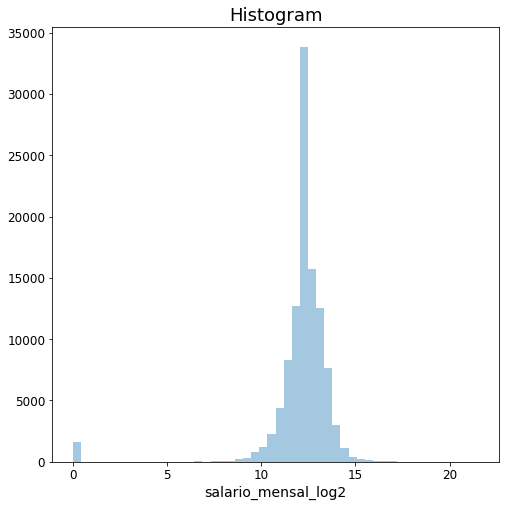

In [50]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['salario_mensal_log2'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('salario_mensal_log2',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

Percebe-se que ainda há outliers, contudo os dados estão melhor distribuidos. De momento temos esse ajuste a fazer, caso o modelo não performe bem com essa nova coluna ou com a original, iremos remover esses outliers

#### Variavel alvo:  numero_linhas_crdto_aberto

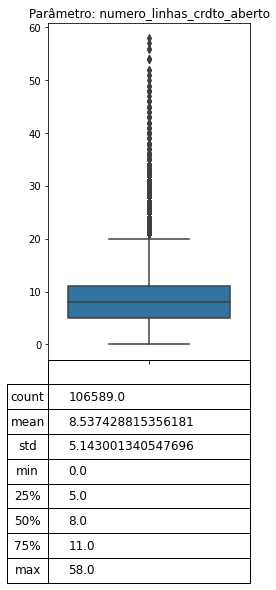

In [51]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'numero_linhas_crdto_aberto')

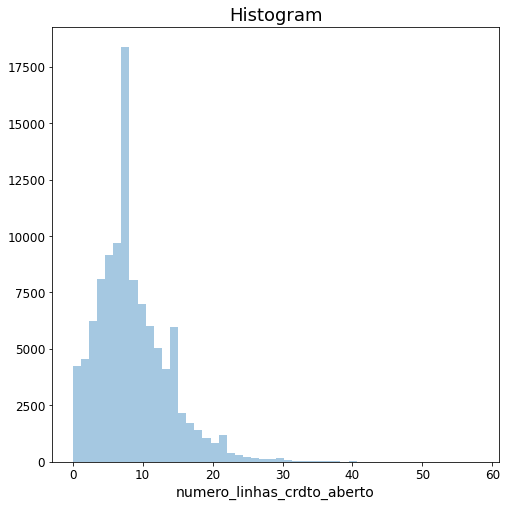

In [52]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['numero_linhas_crdto_aberto'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('numero_linhas_crdto_aberto',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [53]:
df_train_treated[df_train_treated['numero_linhas_crdto_aberto']> 30]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas,salario_mensal_log2
43,0.368876,68,0,1687.500000,1.0,31,0,1,0,0.0,0,1,0.000000
1361,0.462736,64,0,0.575631,8600.0,32,0,3,0,0.0,0,0,13.070121
1569,0.267369,50,0,0.420292,23033.0,46,0,6,0,0.0,0,0,14.491415
2231,0.040159,60,0,2519.000000,5400.0,33,0,3,0,0.0,0,1,12.398744
2519,0.026573,78,0,0.440579,3592.0,31,0,2,0,0.0,0,0,11.810572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105056,0.955751,41,0,0.583659,10500.0,36,0,0,0,2.0,0,0,13.358102
105456,0.303390,47,1,3.570074,8333.0,33,0,13,0,0.0,0,1,13.024620
105824,0.501211,56,0,0.602872,5501.0,32,0,2,0,0.0,0,0,12.425478
106275,0.004029,72,0,0.008589,7916.0,51,0,0,0,1.0,0,0,12.950556


Os cenarios apresentados por essa variavel tem sustentacão no mundo real, pois o cliente recorreu ao crédito devido a dividas, ou mesmo para investir em algum negócio.

Por enquanto os dados dessa variavel serão mantidos.

#### Variavel alvo:  numero_emprestimos_imobiliarios

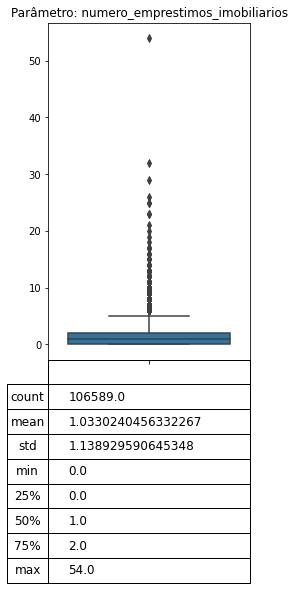

In [54]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'numero_emprestimos_imobiliarios')

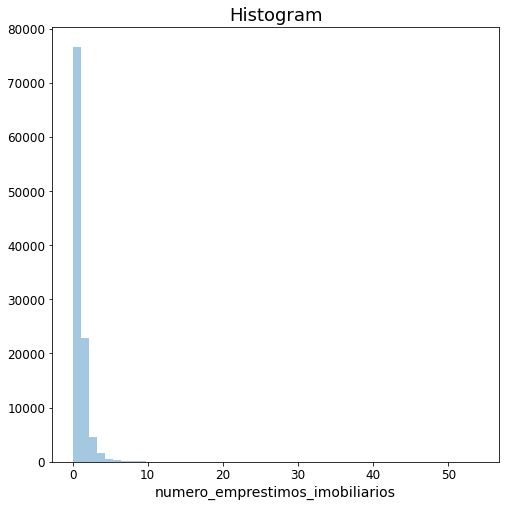

In [55]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['numero_emprestimos_imobiliarios'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('numero_emprestimos_imobiliarios',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [56]:
# Clientes com mais de 10 emprestimos imobiliarios
df_train_treated[df_train_treated['numero_emprestimos_imobiliarios'] > 10].count()[0]

66

In [57]:
# Clientes com mais de 10 emprestimos imobiliarios
df_train_treated[df_train_treated['numero_emprestimos_imobiliarios'] > 10].head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas,salario_mensal_log2
2421,0.451376,48,0,2.511961,12080.0,29,0,17,0,2.0,1,1,13.560333
4658,0.963012,39,2,3.173399,5916.0,19,0,12,0,2.0,1,1,12.530406
4683,0.040457,65,0,0.986113,17570.0,20,0,11,0,0.0,0,0,14.100827
6795,0.167865,41,0,0.422033,25433.0,14,0,11,0,0.0,0,0,14.634414
11196,0.006730,64,0,2.072070,10697.0,15,0,11,0,0.0,0,1,13.384919


In [58]:
# Clientes com mais de 10 emprestimos imobiliarios
df_train_treated[df_train_treated['numero_emprestimos_imobiliarios'] > 10].describe()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas,salario_mensal_log2
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.258061,52.333333,0.727273,2250.914906,23690.590909,25.303030,0.106061,15.363636,0.166667,0.651515,0.272727,0.484848,13.786802
std,0.253877,11.876717,1.504306,7569.993878,43398.956267,7.924586,0.746866,6.724551,1.046361,1.102339,0.448775,0.503600,1.257961
min,0.000000,27.000000,0.000000,0.129298,2512.000000,14.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,11.294621
25%,0.043665,44.000000,0.000000,0.605524,8000.000000,19.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,12.965784
50%,0.159433,50.000000,0.000000,0.925607,13699.500000,24.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,13.741798
75%,0.395417,60.750000,1.000000,2.515019,19695.750000,29.000000,0.000000,16.000000,0.000000,1.000000,1.000000,1.000000,14.265573
max,0.963012,77.000000,7.000000,52112.000000,324000.000000,58.000000,6.000000,54.000000,8.000000,4.000000,1.000000,1.000000,18.305634


Pontos a destacar:<br>
- Temos 67 clientes que solicitaram mais 10 emprestimos imobiliários
- Esses clientes possuem uma idade média de 50 anos
- Até 50% dos clientes tem mais patrimonio do que dividas
- Até 75% possuem um salario 6900 ou mais
- Possuem em média 25 emprestimos em aberto

No geral são clientes mais velhos, que ganham bem e que fazem muitos empréstimos.
Incluem-se aqui clientes que no geral pertencem a <b>Geracão Baby Boomer e Geracão X</b> logo podemos presumir que as altas solicitacões de crédito podem corresponder ao fato de quererem ter ou manter um imovel.

Por enquanto esses registros serão mantidos.

#### Variavel alvo:  numero_de_dependentes

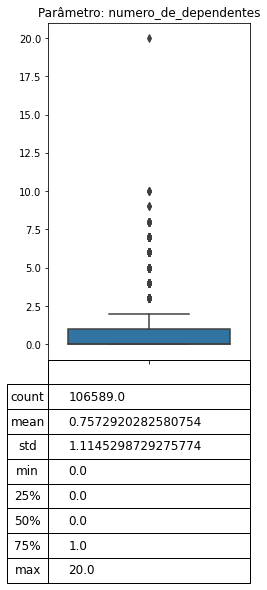

In [59]:
# Analisando as principais métricas estatísticas junto a um boxplot
fn_show_individual_outlier(df_train_treated, 'numero_de_dependentes')

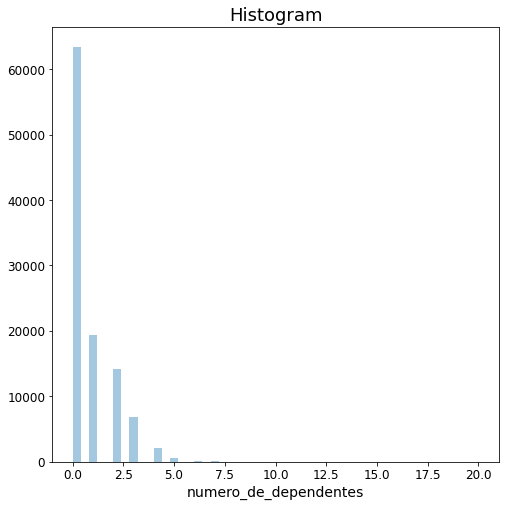

In [60]:
## Tamanho da figura
plt.figure(figsize=(8, 8))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_train_treated['numero_de_dependentes'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('numero_de_dependentes',
           fontsize = 14)

## Titulo
plt.title('Histogram', 
          fontsize = 18)

## Exibir
plt.show()

In [61]:
# Analisando os percentis
lst_percent = [0, 5, 25, 50, 75, 90, 95, 99, 99.9999, 100]

for x in lst_percent:
    print('Percentil [' + str(x) + '] igual a: ' + 
          str(np.percentile(df_train_treated['numero_de_dependentes'], x)))

Percentil [0] igual a: 0.0
Percentil [5] igual a: 0.0
Percentil [25] igual a: 0.0
Percentil [50] igual a: 0.0
Percentil [75] igual a: 1.0
Percentil [90] igual a: 2.0
Percentil [95] igual a: 3.0
Percentil [99] igual a: 4.0
Percentil [99.9999] igual a: 18.934119999903487
Percentil [100] igual a: 20.0


In [62]:
# Clientes com mais de 8 dependentes
df_train_treated[df_train_treated['numero_de_dependentes'] > 10]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente,possui_mais_dividas,salario_mensal_log2
6132,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0,0,0,12.624795


Não é incomum vermos casos de pessoas com 10 dependentes ou até mesmo 20, afinal pode ser uma família com muitos filhos, netos, bisnetos, sobrinhos o que faria muito sentido, e é bem comum principalmente no imposto de renda, incluir muitos dependentes.

### Exportando os Dados

In [63]:
df_train_treated.to_csv('processed_data/train_treated_v2.csv', index = False)

In [64]:
df_test_treated.to_csv('processed_data/test_treated_v2.csv', index = False)